<h1>BITS F464 - Semester 1 - MACHINE LEARNING</h1>
<br>
<h4>ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION</h4>
<h4>Team number: 8</h4>
<h4>Team members: Arnav Arvind, Arnav Yayavaram, Shailesh Chandra Rao, Siddharth Yayavaram, Suryansh Chandola</h4>

<h4>Team member Ids: 2021A7PS2719H, 2021A7PS3117H, 2021A7PS2064H, 2021A7PS3116H, 2021A7PS0058H</h4>

<h4>This assignment aims to identify the differences between three sets of Machine Learning models.</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sdv.metadata import SingleTableMetadata    #this has been imported to create a metadata object for our dataset
from sdv.lite import SingleTablePreset
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<h1>1. Dataset Generation</h1>

In [2]:
input_df = pd.read_csv('diabetes2 - Diabetes.xls.csv')
input_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
metadata = SingleTableMetadata()    #creating the instance
metadata.detect_from_dataframe(data=input_df)    #automatically detect metadata from your dataframe

In [4]:
metadata.to_dict()    #inspecting metadata

{'columns': {'Pregnancies': {'sdtype': 'numerical'},
  'Glucose': {'sdtype': 'numerical'},
  'BloodPressure': {'sdtype': 'numerical'},
  'SkinThickness': {'sdtype': 'numerical'},
  'Insulin': {'sdtype': 'numerical'},
  'BMI': {'sdtype': 'numerical'},
  'DiabetesPedigreeFunction': {'sdtype': 'numerical'},
  'Age': {'sdtype': 'numerical'},
  'Outcome': {'sdtype': 'numerical'}},
 'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1'}

In [6]:
synthesizer = SingleTablePreset(metadata, name='FAST_ML')    #creating a custom synthesizer using the FAST_ML preset synthesizer
synthesizer.fit(input_df)                                    #and the metadata for the dataframe created

In [7]:
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19,10,38.387409,0.561331,40,1
1,0,151,44,6,105,26.125923,0.463959,27,1
2,3,169,57,24,240,33.224573,0.541364,36,0
3,4,86,61,35,0,32.918264,0.526311,39,0
4,6,75,62,31,77,37.453830,0.178734,21,0


In [8]:
synthetic_data.to_csv('synthetic_dataset.csv')    #the generated dataset can be found in the same directory as this notebook

<h1>2. Preprocess and perform exploratory data analysis of the dataset <t>obtained</h1>

<p>Since the number of inputs belonging to class 0 is almost double the number of inputs belonging to class 1, it would be more beneficial to have additional data that represents the classes in a more equitable manner.<p>
<br>
<p>The data given is such that the model learrns to predict 0s in a proper manner but is unreliable for finding 1s. This leads to a larger amount of false negatives, which is extremely harmful for predicting data concerning a medical situation such as diabetes.</p>
<br>
<p>The number of false negatives (FN) can be observed in the confusion matrix as shown below:</p>
<!-- <img src="./image.png"> -->
<img src='image.jpg' width="400" height="400">

In [9]:
def standardize(column):    #returns the passed column as a normal distribution
    return (column - column.mean()) / column.std()

def apply(X):
    cols=list(X)
    for i in cols:
        X[i]=standardize(X[i])

In [10]:
synthetic_data.shape    #the generated dataset has 500 rows and 9 columns

(500, 9)

In [11]:
synthetic_data.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.056008,0.076867,-0.095012,0.007312,-0.069170,-0.112379,0.526535,0.140868
Glucose,0.056008,1.000000,0.125647,0.048420,0.388294,0.271193,0.134433,0.217024,0.395676
BloodPressure,0.076867,0.125647,1.000000,0.276850,0.178255,0.293542,0.063545,0.196416,0.001302
SkinThickness,-0.095012,0.048420,0.276850,1.000000,0.386702,0.441714,0.143424,-0.121843,0.102990
Insulin,0.007312,0.388294,0.178255,0.386702,1.000000,0.222160,0.083254,-0.032980,0.158071
BMI,-0.069170,0.271193,0.293542,0.441714,0.222160,1.000000,0.105815,0.002211,0.249757
DiabetesPedigreeFunction,-0.112379,0.134433,0.063545,0.143424,0.083254,0.105815,1.000000,-0.007778,0.109530
Age,0.526535,0.217024,0.196416,-0.121843,-0.032980,0.002211,-0.007778,1.000000,0.094062
Outcome,0.140868,0.395676,0.001302,0.102990,0.158071,0.249757,0.109530,0.094062,1.000000


We observe that the following columns have some correlation to each other:
<table>
    <tr>
        <th>Column1</th><th>Column2</th>
    </tr>
    <tr>
        <th>Pregnancies</th><th>Age</th>
    </tr>
    <tr>
        <th>Glucose</th><th>Insulin</th>
    </tr>
    <tr>
        <th>Glucose</th><th>Outcome</th>
    </tr>
    <tr>
        <th>SkinThickness</th><th>Insulin</th>
    </tr>
    <tr>
        <th>SkinThickness</th><th>BMI</th>
    </tr>

<p>Using the pairplot feature of seaborn to get an overview of relation between different columns in the dataset</p>

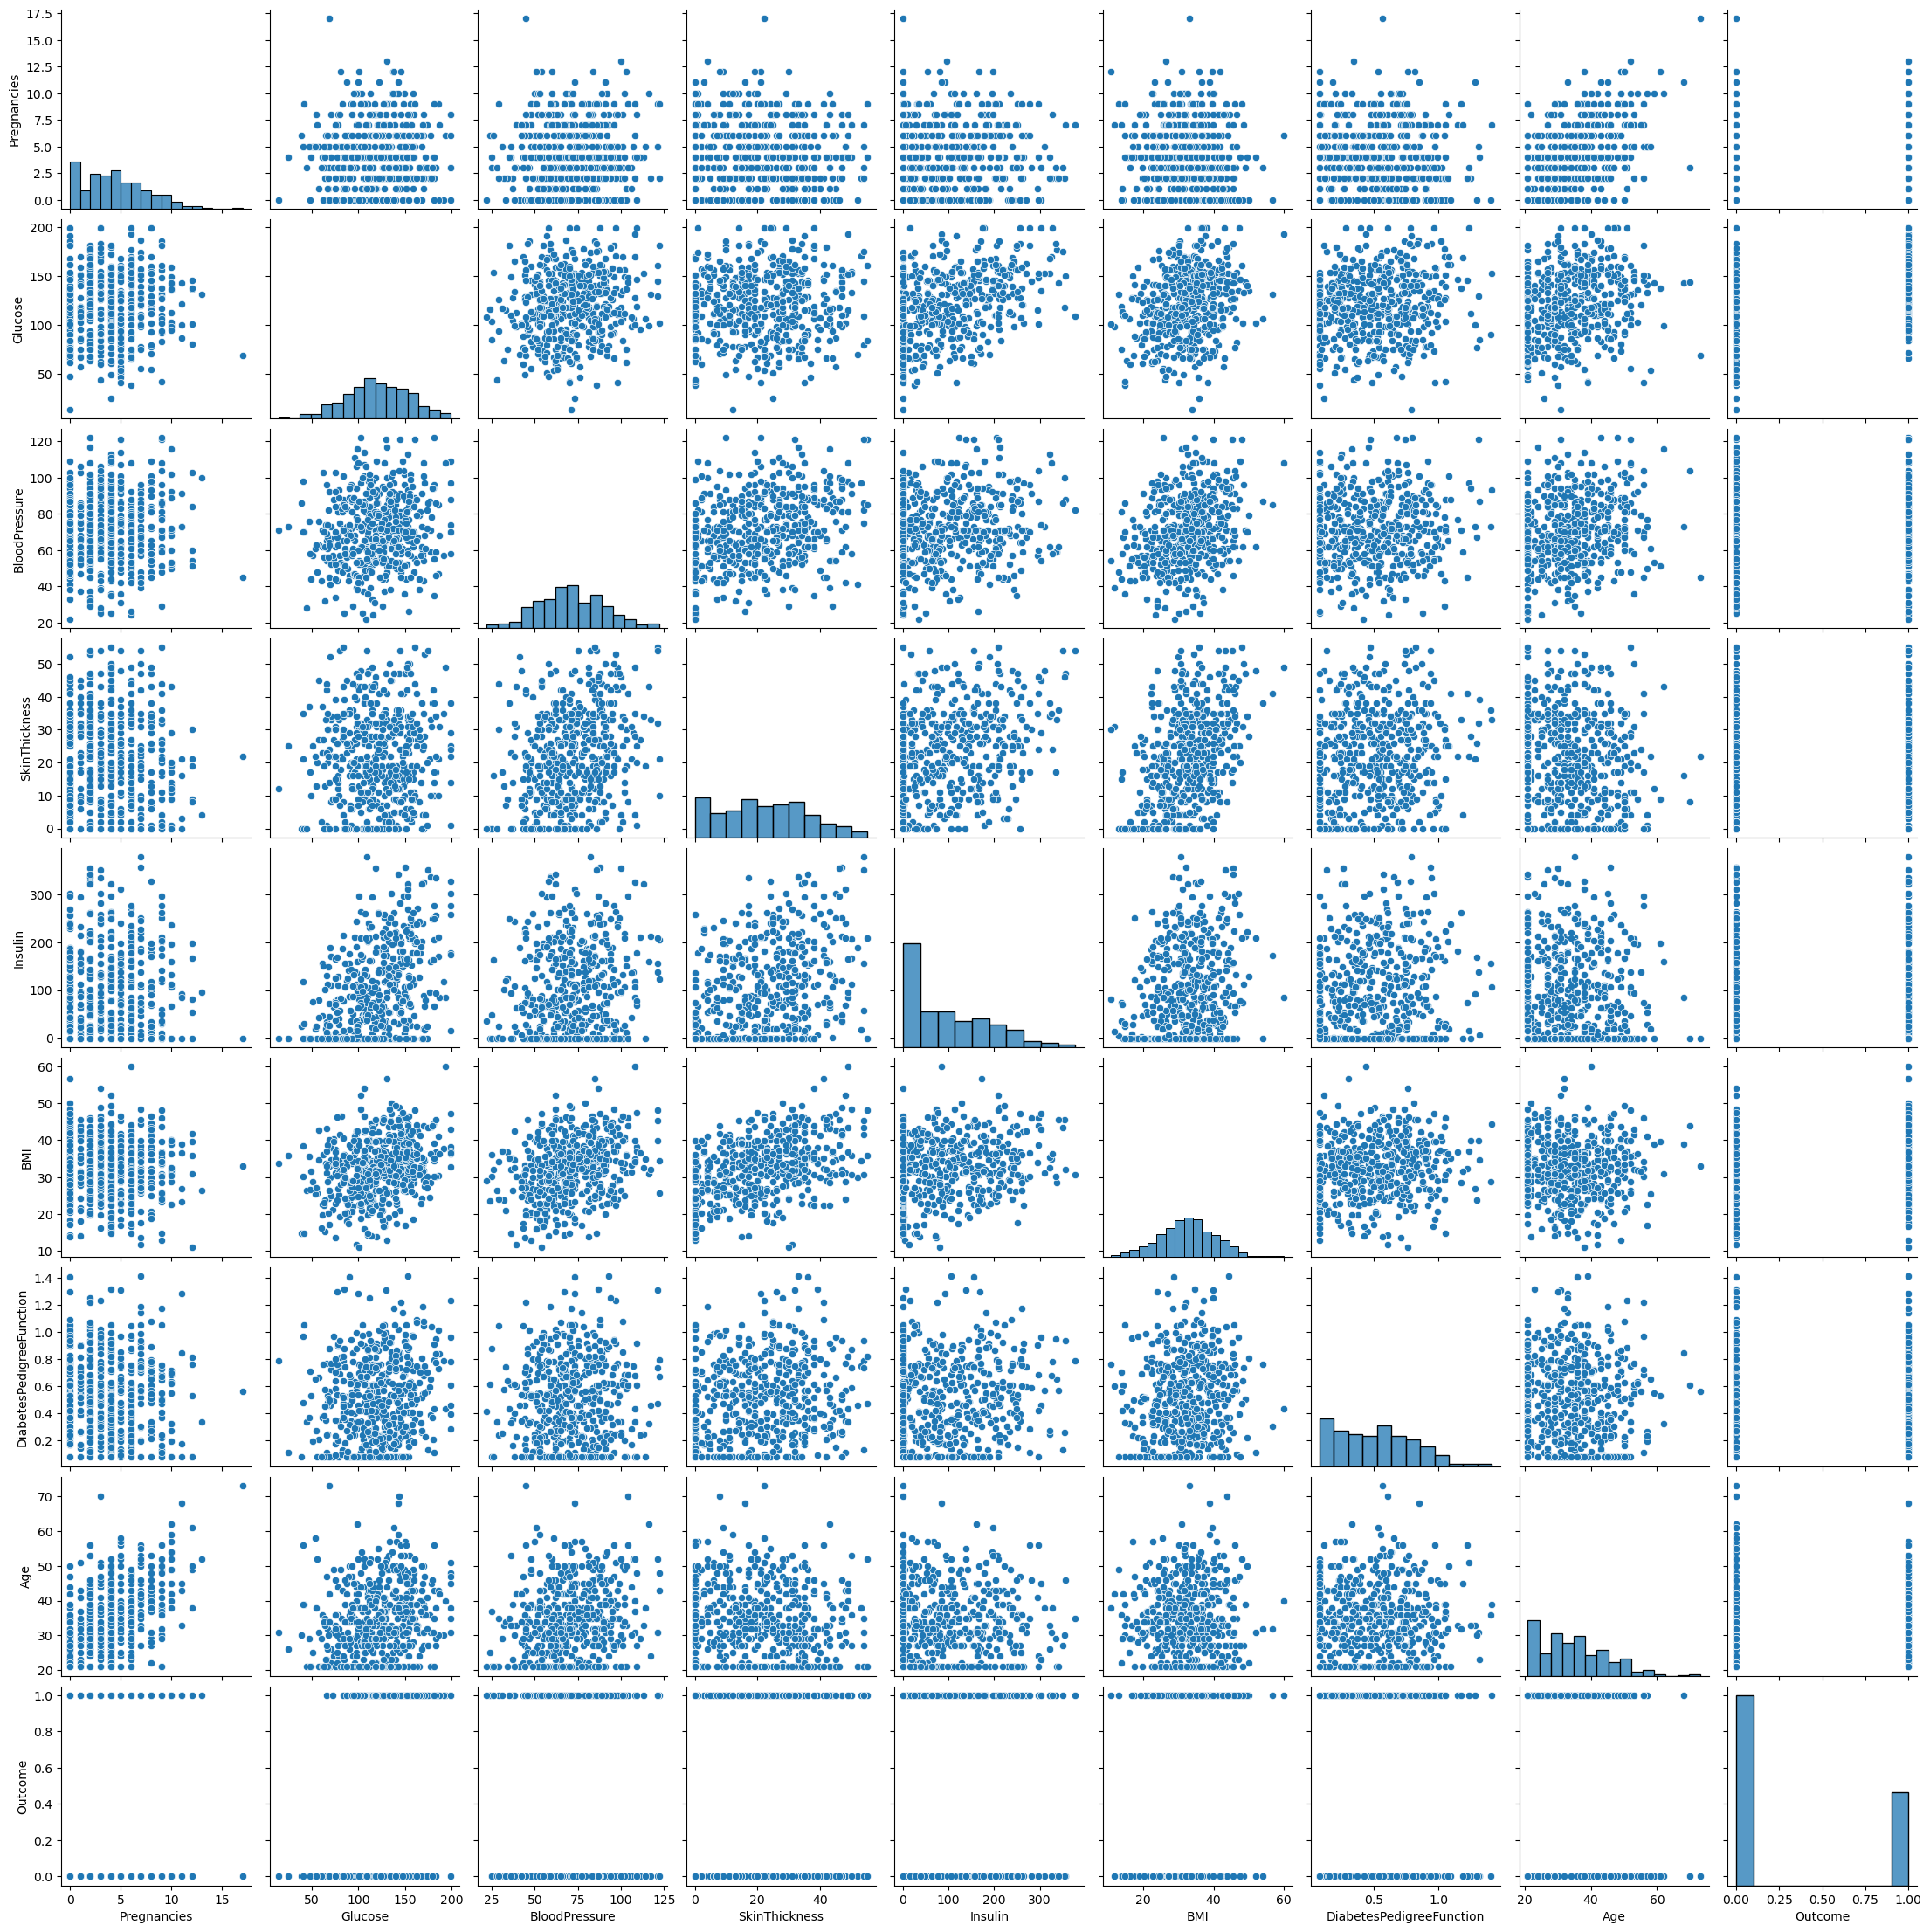

In [12]:
sns.pairplot(synthetic_data)  

<p>We observe that there are more than 300 entries corresponding to 0 whereas the number of 1s is about half of that. This is not recommended for classification since the model learns to make predictions tuned more towards class 0. Ideally we would like to have equal amounts of samples for each class.</p>

(array([335.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 165.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

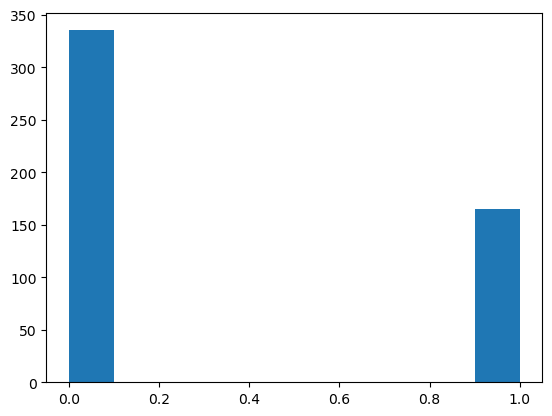

In [13]:
plt.hist(synthetic_data['Outcome']) 

<u>Plotting Glucose vs blood pressure</u>
<br>
It has been found that sugar also can increase blood pressure by acting on nitric oxide (NO) production in blood vessels.

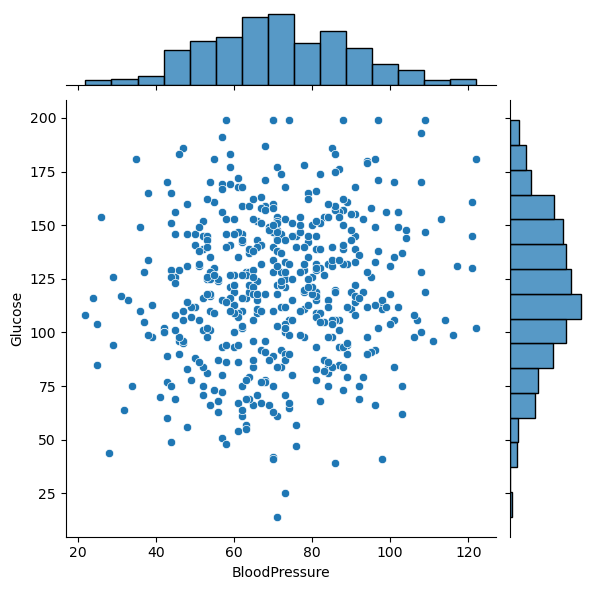

In [14]:
sns.jointplot(data=synthetic_data,x='BloodPressure',y='Glucose')    #a slight linear relation can be observed between 
                                                                    #Glucose and BLoodPressure

<u>Plotting Glucose vs BMI</u>
<br>
<p>Since research says that overnutrition is one of the potential factors that may generate insulin resistance, which in turn may increase the sugar or glucose content in the blood leading to diabetes</p>

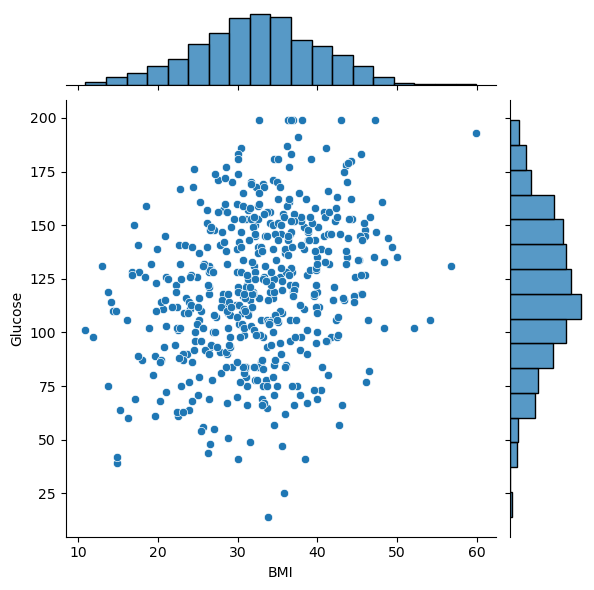

In [15]:
sns.jointplot(data=synthetic_data,x='BMI',y='Glucose')    #a slight linear relation can be observed between 
                                                          #BMI and Glucose

<u>Plotting Blood Pressure vs BMI</u>
<br>
<p>Research indicates a significant positive correlation between BMI, fat percentage, and blood pressure. Overweight/obese subjects are more likely to have hypertension than those with normal BMI.</p>

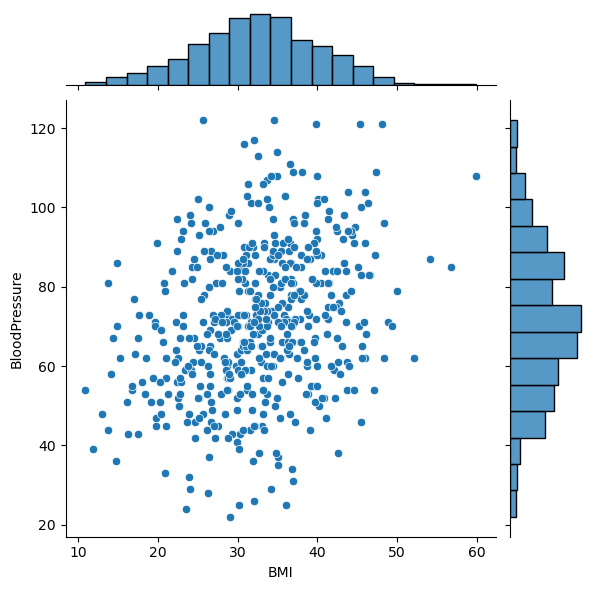

In [16]:
sns.jointplot(data=synthetic_data,x='BMI',y='BloodPressure')    #a slight linear relation can be observed between 
                                                                #BMI and BloodPressure

<u>Plotting Age vs Outcome</u>
<br>
<p>Plotting age versus outcome led us to the conclusion that for an individual in the age group 20 years to 50 years, the likelihood of having diabetes is lesser than not having diabetes which is evident by the dark colour of the column in the specified range for outcome 0.</p>

<Axes: xlabel='Outcome', ylabel='Age'>

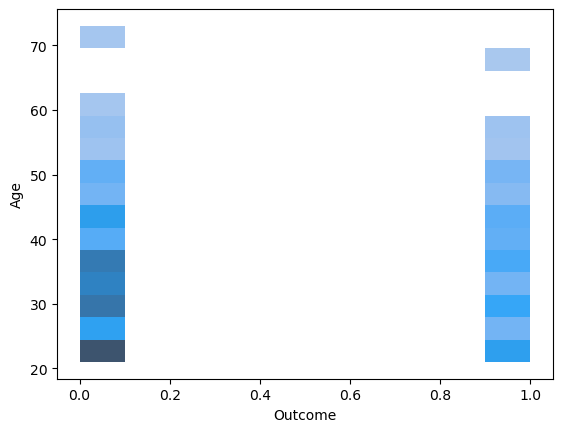

In [17]:
sns.histplot(data=synthetic_data,x='Outcome',y='Age') 

In [18]:
X = synthetic_data.drop(['Outcome'],axis = 1)
y = synthetic_data['Outcome']
X_train, X_test,y_train, y_test = train_test_split(X, y ,random_state=23, test_size=0.2)
apply(X_train)
apply(X_test)

<u>Here we summarise our findings and conclusions from the dataset.</u><br>
- The dataset quality can be improved, since the number of samples belonging to class 0 is almost double that of class 1. Ideally, a more equitable representation of both classes would be preferred to prevent any learning bias.
- Using machine learning algorithms, we were able to achieve satisfactory levels of accuracy. Thus the quantity of the dataset seems adequate. However, For even better results, a larger dataset would be beneficial.
- There is no distinct linear relation between any two columns of the dataset.
- However, some columns are related to each other as shown by the correlation matrix.
- Individuals in the below the age of 40 are less prone to diabetes.

<h1>3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression</h1>
<br>
<h2>Stochastic Gradient Descent</h2>

<p>The SGDModel is a class which represents an implementation of the Stochastic Gradient Descent algorithm. The constructor requires the test inputs(X), the corresponding target values(y) along with hyperparameters such as the number of epochs and learning rate. In case the mentioned hyperparameters are not specified in the constructor, 500 epochs with a learning rate of 0.1 are performed on the given input.</p>
<br>
<p>After entering the input matrix X in the model an additional column is created to accomodate for the bias terms. All terms of this column are set to one. This is done to represent the formula $ \sum w_{i}x_{i} = y$, where $x_{0} = 1$.</p>
<br>
<p>The fit method optimizes the weight vector w which is initialized to all zeros using the SGD algorithm. The specific feature of updating weights after each training sample is achieved using for loops. The method has an outer for loop representing an epoch. In each epoch, we are iterating through each sample which is represented by the second for loop. In this loop the output value is calculated(y) for use in the third loop. In the third for loop we calulate the gradient for each weight and update the weight.</p>
<br>
<p>The predict method is used to predict the target value. The $x_{0}$ column is added to the start of the input before computation..</p>

In [19]:
class SGDModel:
    y = []
    X = []
    w = []
    epochs = 0
    features = 0
    samples = 0
    def __init__(self,X,y,epochs = 500,alpha=0.1):
        self.X = np.hstack((np.ones((X.shape[0],1)),X))
        self.y = np.array(y)
        self.w = np.zeros(self.X.shape[1])
        self.samples = X.shape[0]
        self.epochs = epochs
        self.features = X.shape[1]+1
        self.alpha = alpha
        self.losses = []
    
    def fit(self):
        for epoch_counter in range (0,self.epochs):
            for sample_counter in range(0,self.samples):
                output = np.dot(self.X[sample_counter],self.w)-self.y[sample_counter]
                self.losses.append(output)
                for feature_counter in range(0,self.features):
                    derivative = output*self.X[sample_counter][feature_counter]
                    self.w[feature_counter]-=derivative*self.alpha
            
    def predict(self,X_test):
        X_test1 = np.hstack((np.ones((X_test.shape[0],1)),X_test))
        predictions = []
        for x in X_test1:
            predictions.append(np.dot(x,self.w))
        return np.array(predictions)
    
    def calc_loss(self, X):
        sum = 0
        for x in X:
            sum+=x**2
        return sum
            
    def loss_plot(self):
        losses = np.array(self.losses).reshape(self.epochs,self.samples)
        mean_losses = []
        for i in range(losses.shape[0]):
            mean_losses.append(self.calc_loss(losses[i]))
        x = list(range(1,len(mean_losses)+1))
        y = mean_losses
        plt.plot(x, y)
        plt.title(f"Epochs vs Loss for a Stochastic Gradient Descent Algorithm with {self.epochs} epochs and learning rate {self.alpha}")
        plt.show()

In [20]:
mySGDModel = SGDModel(X_train,y_train,200,0.0001)
mySGDModel.fit()

<p>Since the linear regression model will give a continuous output. This discriminant function maps any value less than 0.5 to class 0 and other values to class 1.</p>

In [21]:
def discriminant(x):
    if x<0.5:
        return 0
    return 1
vectorized_discriminant = np.vectorize(discriminant)

In [22]:
SGD_predictions = mySGDModel.predict(X_test)
rounded_SGD = vectorized_discriminant(SGD_predictions)
rounded_SGD

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

<p>To get a measure of the accuracy of our model, we use the sklearn.metrics module's classification report and confusion matrix.</p>

In [23]:
print(classification_report(y_test, rounded_SGD, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.86      0.90      0.88        72
     class 1       0.71      0.61      0.65        28

    accuracy                           0.82       100
   macro avg       0.78      0.75      0.77       100
weighted avg       0.81      0.82      0.82       100



In [24]:
print(confusion_matrix(y_test,rounded_SGD))

[[65  7]
 [11 17]]


<h2>Batch Gradient Descent</h2>

<p>The BGDModel is a class which represents an implementation of the Batch Gradient Descent algorithm. The constuctor works the same way as the constructor of SGDModel.</p>
<br>
<p>After entering the input matrix X in the model an additional column is created to accomodate for the bias terms. All terms of this column are set to one. This is done to represent the formula $ X^{T}w = y$, where $X_{i}$ is a ($d$+1) x 1 vector where d represents the number of input features and $X_{i0} = 1$. The gradient is calculated using the equation $X^{T}Xw - X^{T}y$.</p>
<br>
<p>The fit method optimizes the weight vector w which is initialized to all zeros using the BGD algorithm.</p>
<br>
<p>The predict method is used to predict the target value. The $x_{0}$ column is added to the start of the input before computation..</p>

In [25]:
class BGDModel:
    y = []    #vector of target values
    X = []    #input matrix
    w = []    #weight vector
    predictions = []    #list of predicted values 
    
    def __init__(self,X,y,epochs=500,alpha=0.01):    #constructor to initialize all variables
        self.y = y
        self.X = np.hstack(((np.ones((X.shape[0],1))),X))
        self.predictions = []
        self.epochs = epochs
        self.alpha = alpha #learning rate 0.001
        self.w = np.zeros((self.X.shape[1]))    #initializing the weights with a value of 0
        self.losses = []
    
    def calc_loss(self, X):
        sum = 0
        for x in X:
            sum+=x**2
        return sum
    
    def fit(self):    #adjusting the weights using batch gradient descent method
        gradJ = np.dot(np.dot( self.X.transpose(),self.X ),self.w) - np.dot(self.X.transpose(),self.y)    #gradient vector for the cost function(assumed to be SSE)
        for epoch in range(self.epochs):    #while the gradient is outside the range (min_threshhold,max_threshhold)
            self.losses.append(self.calc_loss(np.dot(self.X, self.w)-self.y))
            self.w = self.w - self.alpha*gradJ
            gradJ = np.dot(np.dot(self.X.transpose(),self.X),self.w)-np.dot(self.X.transpose(),self.y)
            
    def predict(self,x_test):    #finding the output value calculated by multiplying the x_test matrix with the weight vector
        x_test1 = np.hstack( ((np.ones((x_test.shape[0],1))),x_test) )
        for x in x_test1:
            self.predictions.append(np.dot(x,self.w))
        return np.array(self.predictions)
    
    def loss_plot(self):
        x = list(range(1,len(self.losses)+1))
        y = self.losses
        plt.plot(x, y)
        plt.title(f"Epochs vs Loss for a Batch Gradient Descent Algorithm with {self.epochs} epochs and learning rate {self.alpha}")
        plt.show()

<p>The discriminant is used to map each output to a class.</p>

In [26]:
myBGDModel = BGDModel(X_train,y_train,200,0.0001)
myBGDModel.fit()
BGD_predictions = myBGDModel.predict(X_test)
rounded_BGD = vectorized_discriminant(SGD_predictions)
rounded_BGD

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

<p>The classification report and the confusion matrix are computed and printed<p>

In [27]:
print(classification_report(y_test, rounded_BGD, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.86      0.90      0.88        72
     class 1       0.71      0.61      0.65        28

    accuracy                           0.82       100
   macro avg       0.78      0.75      0.77       100
weighted avg       0.81      0.82      0.82       100



In [28]:
print(confusion_matrix(y_test,rounded_BGD))

[[65  7]
 [11 17]]


<h2>Insights Drawn</h2>

- Our gradient descent models worked fairly well for the given dataset with the addition of a discriminant function. We were able to get an accuracy of 82%(same as sklearn linear regression model on the dataset).
- The SGD algorithm converges faster. In our models we used 1000 epochs and a learning rate of 0.0001. We took an sklearn linear regression model's predictions as our reference and then found the rms values of the error for BGD and SGD for the same value of hyperparameters. The result was that the SGD model gave a smaller rms value.
- Due to larger weight updates, the BGD model is more prone to overshooting. Trying to fit the models with a learning rate of 0.01 and 100 epochs led to overshooting. However the severity of overshooting was more in the case of BGD.
- After plotting the error vs epochs for both the algorithms, we found that at around 100 epochs the models would give satisfactory results. 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
rounded_predictions = vectorized_discriminant(predictions)
print("| For the sklearn linear regression model:")
print("  -----------------------------------------")
print(classification_report(y_test, rounded_predictions, target_names=["class 0","class 1"]))
print(confusion_matrix(y_test,rounded_predictions),"\n\n\n")
print("| For our SGDModel with 500 epochs and 0.0001 learning rate:")
print("  ---------------------------------------------------------")
print(classification_report(y_test, rounded_SGD, target_names=["class 0","class 1"]))
print(confusion_matrix(y_test,rounded_SGD),"\n\n\n")
print("| For our BGDModel with 300 epochs and learning rate 0.0001:")
print("  ---------------------------------------------------------")
print(classification_report(y_test, rounded_BGD, target_names=["class 0","class 1"]))
print(confusion_matrix(y_test,rounded_BGD))

| For the sklearn linear regression model:
  -----------------------------------------
              precision    recall  f1-score   support

     class 0       0.86      0.90      0.88        72
     class 1       0.71      0.61      0.65        28

    accuracy                           0.82       100
   macro avg       0.78      0.75      0.77       100
weighted avg       0.81      0.82      0.82       100

[[65  7]
 [11 17]] 



| For our SGDModel with 500 epochs and 0.0001 learning rate:
  ---------------------------------------------------------
              precision    recall  f1-score   support

     class 0       0.86      0.90      0.88        72
     class 1       0.71      0.61      0.65        28

    accuracy                           0.82       100
   macro avg       0.78      0.75      0.77       100
weighted avg       0.81      0.82      0.82       100

[[65  7]
 [11 17]] 



| For our BGDModel with 300 epochs and learning rate 0.0001:
  -----------------------------

In [31]:
epochs = 200
lr = 0.0001
SGD = SGDModel(X_train, y_train, epochs, lr)
BGD = BGDModel(X_train, y_train, epochs, lr)
SGD.fit()
BGD.fit()
sgd_with_100_epochs = SGD.predict(X_test)
bgd_with_100_epochs = BGD.predict(X_test)
print(f"| The rms errors when using {epochs} epochs with {lr} learning rate and taking the sklearn linear regression model as reference:")
print("  -------------------------------------------------------------------------------------------------------------------------------")
print(f"  SGDModel: {np.sqrt(mean_squared_error(y_test, SGD_predictions))} BGDModel: {np.sqrt(mean_squared_error(y_test, BGD_predictions))}\n")
print(f"  The SGD rms value is smaller than the BGD value for epochs: {epochs} and lr: {lr}\n")

| The rms errors when using 200 epochs with 0.0001 learning rate and taking the sklearn linear regression model as reference:
  -------------------------------------------------------------------------------------------------------------------------------
  SGDModel: 0.38880471079367346 BGDModel: 0.38891521768080634

  The SGD rms value is smaller than the BGD value for epochs: 200 and lr: 0.0001



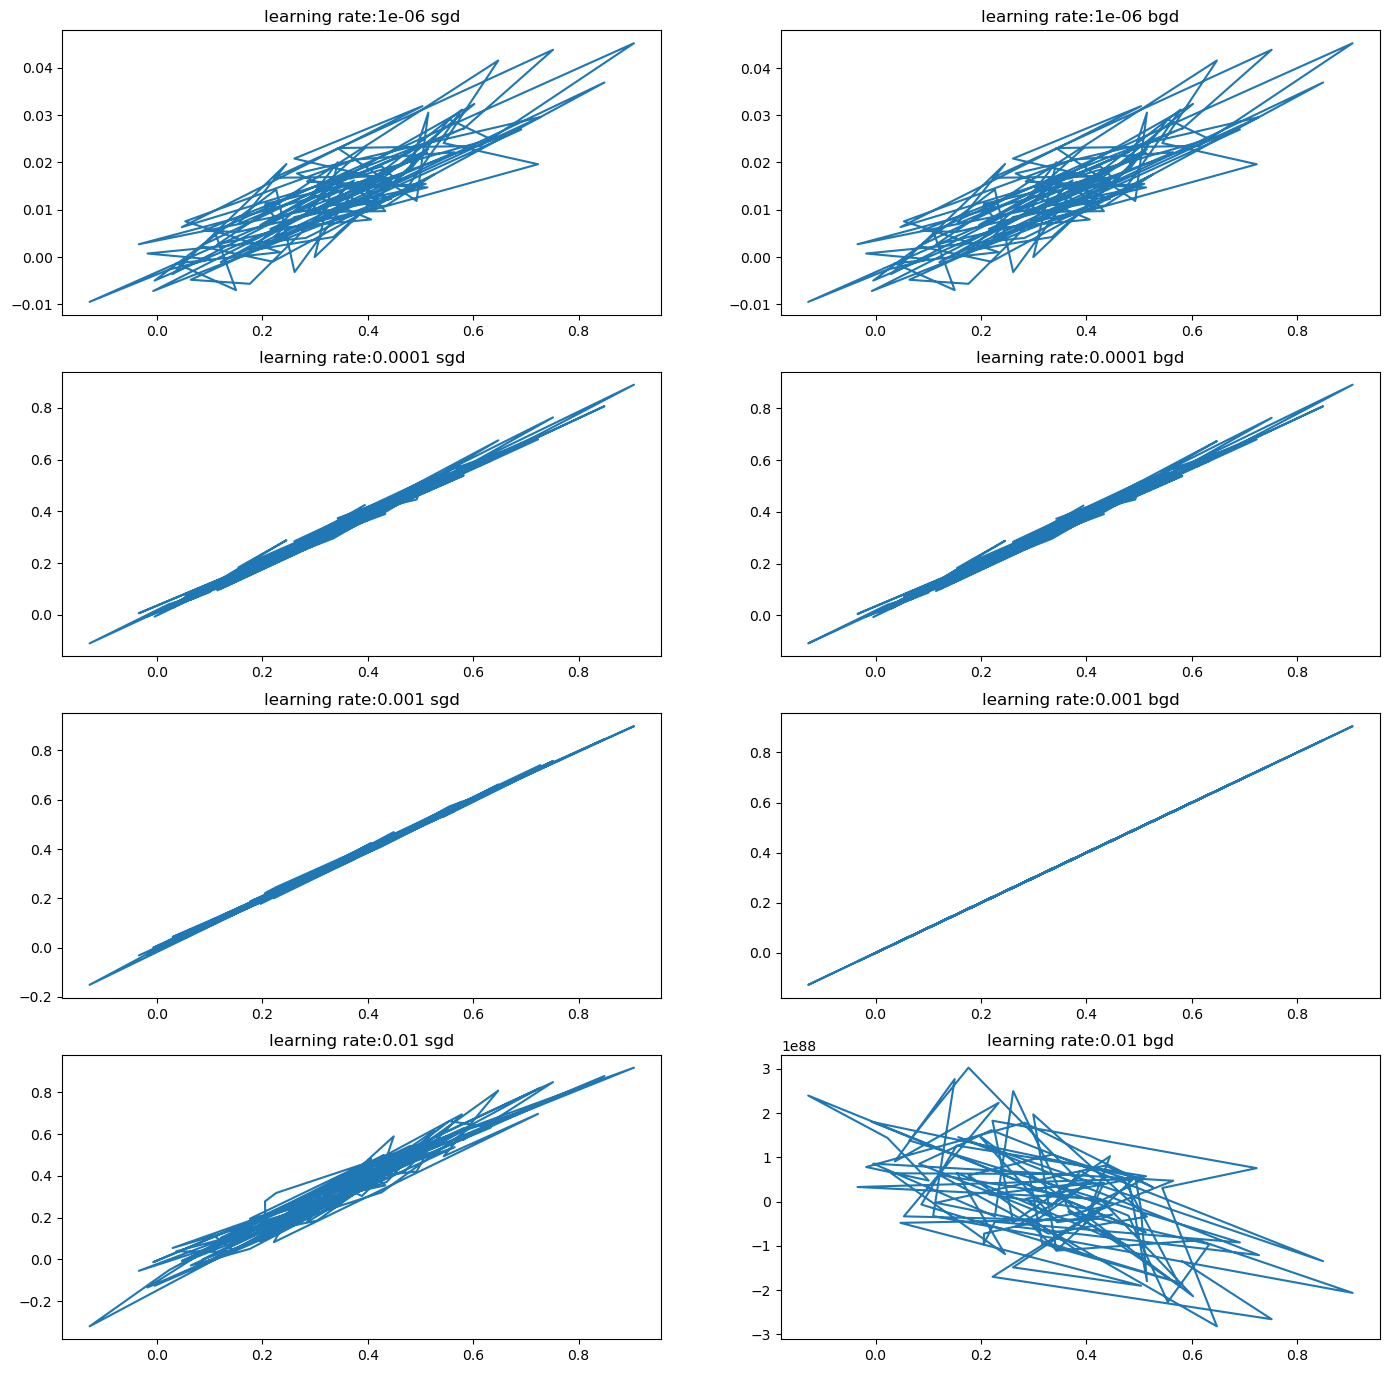

In [32]:
#incerasing the canvas size
plt.figure(figsize=(17,17))
epochs = 100

#plotting the graphs for 100 epochs and learning rate 0.000001
lr = 0.000001
SGD = SGDModel(X_train, y_train, epochs, lr)
BGD = BGDModel(X_train, y_train, epochs, lr)
SGD.fit()
BGD.fit()
sgd = SGD.predict(X_test)
bgd = BGD.predict(X_test)
plt.subplot(4,2,1)
plt.title(f"learning rate:{lr} sgd")
plt.plot(predictions,sgd)
plt.subplot(4,2,2)
plt.title(f"learning rate:{lr} bgd")
plt.plot(predictions,bgd)

#plotting the graphs for 100 epochs and learning rate 0.0001
lr = 0.0001
SGD = SGDModel(X_train, y_train, epochs, lr)
BGD = BGDModel(X_train, y_train, epochs, lr)
SGD.fit()
BGD.fit()
sgd = SGD.predict(X_test)
bgd = BGD.predict(X_test)
plt.subplot(4,2,3)
plt.title(f"learning rate:{lr} sgd")
plt.plot(predictions,sgd)
plt.subplot(4,2,4)
plt.title(f"learning rate:{lr} bgd")
plt.plot(predictions,bgd)

#plotting the graphs for 100 epochs and learning rate 0.001
lr = 0.001
SGD = SGDModel(X_train, y_train, epochs, lr)
BGD = BGDModel(X_train, y_train, epochs, lr)
SGD.fit()
BGD.fit()
sgd = SGD.predict(X_test)
bgd = BGD.predict(X_test)
plt.subplot(4,2,5)
plt.title(f"learning rate:{lr} sgd")
plt.plot(predictions,sgd)
plt.subplot(4,2,6)
plt.title(f"learning rate:{lr} bgd")
plt.plot(predictions,bgd)

#plotting the graphs for 100 epochs and learning rate 0.01
lr = 0.01
SGD = SGDModel(X_train, y_train, epochs, lr)
BGD = BGDModel(X_train, y_train, epochs, lr)
SGD.fit()
BGD.fit()
sgd = SGD.predict(X_test)
bgd = BGD.predict(X_test)
plt.subplot(4,2,7)
plt.title(f"learning rate:{lr} sgd")
plt.plot(predictions,sgd)
plt.subplot(4,2,8)
plt.title(f"learning rate:{lr} bgd")
plt.plot(predictions,bgd)
plt.show()

<p>We see that for learning rate of 0.01 the model starts to overshoot</p><br><br>
<p>Plotting the loss versus the number of epochs for both the algorithms.</p>

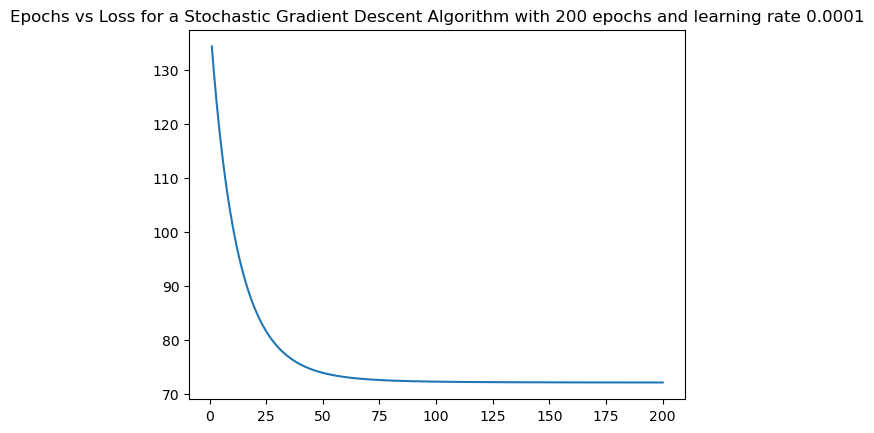

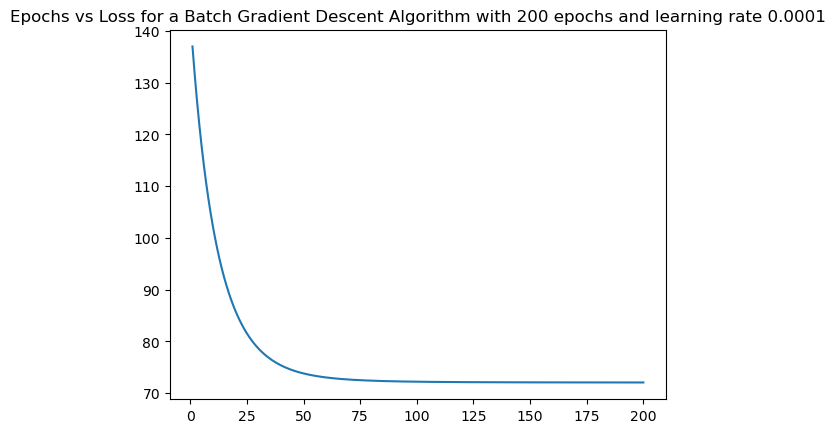

In [33]:
mySGDModel.loss_plot()
myBGDModel.loss_plot()

<h1>4. Comparison of Lasso and Ridge Regression using Polynomial Regression</h1>


<h3>Polynomial Regression</h3>
The PolynomialRegression class is an implementation of polynomial regression - a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. The constructor requires the degree of the polynomial to be provided, taking a default value of 2 if not specified.
<br>
The first step is to create the polynomial features from the input data by raising them to various powers (upto n). These are the features we use to create the model. 
<br>
We calculate the error and train the regression model, providing hyperparameters like learning rate, regularization type (if any), epochs and regularization rate. The weights and bias are updated iteratively using the stochastic gradient descent algorithm shown earlier.
<br>
The predict method is used to predict the target value given the input features.

In [34]:
from itertools import product
from sklearn.metrics import accuracy_score

In [35]:
class PolynomialRegression:
    '''
        class for Polynomial Regression
        
        Attributes:
            - degree (int): defaults to 2, degree of the polynomial which fits to the data
    '''
    def __init__(self, degree = 2):
        '''
            constructor for PolynomialRegression class
            
            Args:
                - degree (int): defaults to 2, degree of the polynomial which fits to the data
        '''
        self.degree = degree
        
    def _make_poly_features(self, X):
            cols = X.columns
            num_variables = len(cols)
            X_poly = pd.DataFrame()

            index = list(range(len(X)))

            count = 0
            X_poly.index = index
            coefficient_combinations = product(range(self.degree + 1), repeat=num_variables)

            for combo in coefficient_combinations:
                if sum(combo) <= self.degree and sum(combo) > 0:
                    name = ""
                    col = np.ones(len(X))
                    for i in range(num_variables):
                        if combo[i] > 0:
                            name += cols[i] + "^" + str(combo[i]) + "*"
                            col *= X[cols[i]]**combo[i]
                    name = name[:-3]
                    col = pd.Series(col)
                    col.index = index
                    col.name = str(name)
                    count += 1
                    X_poly = pd.concat([X_poly, col], axis=1)

            return X_poly
        
    def _error(self, y, y_pred):
        diff = y-y_pred
        reg = 0.
        if (self.reg == "L1"):
            reg = np.sum(np.abs(self.weights))*self.lambda_
        if (self.reg == "L2"):
            reg = np.sum(self.weights**2)*self.lambda_
        return np.sum(diff**2)/(2*len(y))+reg
    
    def transform_fit(self, x, y, learning_rate = 0.1, regularization = "None", epochs = 1000, _lambda = 1):
        
        x = self._make_poly_features(x)
        
        self.reg = regularization
        
        self.bias = 0
        
        self.lambda_ = _lambda
        
        self.weights = np.zeros(x.shape[1])
        
        self.learning_rate = learning_rate

        losses =[]

        n = x.shape[0]
        for epoch in range(epochs):
            y_hat = np.dot(x, self.weights)+self.bias
            diff = y-y_hat
            if (self.reg == "L1"):
                sign = np.where(self.weights > 0, 1, -1)
                gradient = np.dot(x.T, diff) * \
                    self.learning_rate/n + sign*self.lambda_/n
            elif (self.reg == "L2"):
                gradient = np.dot(x.T, diff)*self.learning_rate / \
                    n + self.lambda_*2*self.weights/n
            else:
                gradient = np.dot(x.T, diff)*self.learning_rate/n
            self.weights += gradient
            grad_b = np.sum(diff)*self.learning_rate/n
            self.bias += grad_b
            losses.append(self._error(y, y_hat))
            print(f"epoch : {epoch+1}, loss: ", self._error(y, y_hat))
            
        self.losses = losses
        
    def predict(self, x):
        
        x = self._make_poly_features(x)
        
        return np.dot(x, self.weights)+self.bias
    
    def loss_plot(self):
        x = list(range(1,len(self.losses)+1))
        y = self.losses
        plt.plot(x, y)
        plt.show()

In [36]:
pr = PolynomialRegression(degree = 2)

<h2>No Regularisation</h2>

In [37]:
pr.transform_fit(X_train, y_train, learning_rate= 0.01, regularization="None", epochs=1000, _lambda= 0.01)

epoch : 1, loss:  0.17125
epoch : 2, loss:  0.15741784888301916
epoch : 3, loss:  0.14694178482974607
epoch : 4, loss:  0.1389716466877564
epoch : 5, loss:  0.13287382462735303
epoch : 6, loss:  0.12817604992626846
epoch : 7, loss:  0.12452626327972852
epoch : 8, loss:  0.12166197148535096
epoch : 9, loss:  0.11938741788231183
epoch : 10, loss:  0.11755657398278477
epoch : 11, loss:  0.11606046785896677
epoch : 12, loss:  0.11481774339619659
epoch : 13, loss:  0.11376762653578096
epoch : 14, loss:  0.11286468472756025
epoch : 15, loss:  0.11207492233161112
epoch : 16, loss:  0.11137287131361046
epoch : 17, loss:  0.11073942344789049
epoch : 18, loss:  0.11016021495904528
epoch : 19, loss:  0.10962442274630316
epoch : 20, loss:  0.1091238672533439
epoch : 21, loss:  0.10865234380515179
epoch : 22, loss:  0.10820512416865423
epoch : 23, loss:  0.1077785849454289
epoch : 24, loss:  0.10736993046905827
epoch : 25, loss:  0.10697698612254936
epoch : 26, loss:  0.1065980441321247
epoch : 27,

epoch : 224, loss:  0.08750393209717557
epoch : 225, loss:  0.08747956410780555
epoch : 226, loss:  0.0874553897305806
epoch : 227, loss:  0.08743140683864907
epoch : 228, loss:  0.08740761333552916
epoch : 229, loss:  0.08738400715457019
epoch : 230, loss:  0.0873605862584252
epoch : 231, loss:  0.08733734863853514
epoch : 232, loss:  0.08731429231462373
epoch : 233, loss:  0.0872914153342036
epoch : 234, loss:  0.08726871577209236
epoch : 235, loss:  0.08724619172993925
epoch : 236, loss:  0.08722384133576147
epoch : 237, loss:  0.08720166274349062
epoch : 238, loss:  0.08717965413252808
epoch : 239, loss:  0.08715781370730999
epoch : 240, loss:  0.08713613969688111
epoch : 241, loss:  0.0871146303544775
epoch : 242, loss:  0.0870932839571176
epoch : 243, loss:  0.08707209880520182
epoch : 244, loss:  0.08705107322212037
epoch : 245, loss:  0.08703020555386864
epoch : 246, loss:  0.0870094941686708
epoch : 247, loss:  0.08698893745661077
epoch : 248, loss:  0.08696853382927035
epoch 

epoch : 439, loss:  0.08474829492717909
epoch : 440, loss:  0.08474188660996586
epoch : 441, loss:  0.08473551030528821
epoch : 442, loss:  0.08472916580475096
epoch : 443, loss:  0.08472285290167626
epoch : 444, loss:  0.08471657139108622
epoch : 445, loss:  0.08471032106968551
epoch : 446, loss:  0.08470410173584408
epoch : 447, loss:  0.08469791318958039
epoch : 448, loss:  0.08469175523254466
epoch : 449, loss:  0.08468562766800213
epoch : 450, loss:  0.08467953030081703
epoch : 451, loss:  0.0846734629374362
epoch : 452, loss:  0.08466742538587337
epoch : 453, loss:  0.08466141745569321
epoch : 454, loss:  0.08465543895799588
epoch : 455, loss:  0.08464948970540172
epoch : 456, loss:  0.08464356951203598
epoch : 457, loss:  0.08463767819351384
epoch : 458, loss:  0.08463181556692562
epoch : 459, loss:  0.08462598145082209
epoch : 460, loss:  0.08462017566520005
epoch : 461, loss:  0.08461439803148807
epoch : 462, loss:  0.08460864837253222
epoch : 463, loss:  0.08460292651258232
e

epoch : 652, loss:  0.08387544571022261
epoch : 653, loss:  0.08387291484485307
epoch : 654, loss:  0.0838703936505017
epoch : 655, loss:  0.08386788207974309
epoch : 656, loss:  0.08386538008543408
epoch : 657, loss:  0.08386288762071174
epoch : 658, loss:  0.08386040463899148
epoch : 659, loss:  0.08385793109396497
epoch : 660, loss:  0.08385546693959828
epoch : 661, loss:  0.08385301213012993
epoch : 662, loss:  0.083850566620069
epoch : 663, loss:  0.08384813036419322
epoch : 664, loss:  0.0838457033175471
epoch : 665, loss:  0.08384328543544001
epoch : 666, loss:  0.08384087667344449
epoch : 667, loss:  0.08383847698739423
epoch : 668, loss:  0.08383608633338238
epoch : 669, loss:  0.08383370466775965
epoch : 670, loss:  0.08383133194713267
epoch : 671, loss:  0.08382896812836206
epoch : 672, loss:  0.08382661316856076
epoch : 673, loss:  0.08382426702509228
epoch : 674, loss:  0.083821929655569
epoch : 675, loss:  0.0838196010178503
epoch : 676, loss:  0.08381728107004108
epoch :

epoch : 858, loss:  0.08350618465234462
epoch : 859, loss:  0.08350494164037067
epoch : 860, loss:  0.08350370249558328
epoch : 861, loss:  0.08350246720243519
epoch : 862, loss:  0.08350123574545583
epoch : 863, loss:  0.08350000810925085
epoch : 864, loss:  0.08349878427850178
epoch : 865, loss:  0.08349756423796548
epoch : 866, loss:  0.08349634797247373
epoch : 867, loss:  0.08349513546693287
epoch : 868, loss:  0.08349392670632336
epoch : 869, loss:  0.08349272167569928
epoch : 870, loss:  0.08349152036018802
epoch : 871, loss:  0.08349032274498977
epoch : 872, loss:  0.08348912881537718
epoch : 873, loss:  0.08348793855669484
epoch : 874, loss:  0.08348675195435903
epoch : 875, loss:  0.0834855689938572
epoch : 876, loss:  0.08348438966074762
epoch : 877, loss:  0.08348321394065888
epoch : 878, loss:  0.08348204181928966
epoch : 879, loss:  0.08348087328240815
epoch : 880, loss:  0.0834797083158519
epoch : 881, loss:  0.08347854690552708
epoch : 882, loss:  0.08347738903740848
ep

In [38]:
y_pred = [1 if i > 0.5 else 0 for i in pr.predict(X_test)]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.76


<h2>Lasso Regression</h2>

<p>LASSO regression, also known as L1 regularization, is a regression analysis method that performs both variable selection and regularization to enhance prediction accuracy of the model. LASSO stands for Least Absolute Shrinkage and Selection Operator.</p>
<br>
<p>It uses the L1 norm (sum of absolute weights) while calcualting the penalty term.</p>
<!-- <img src="./image-2.png"> -->
<p style="text-align:center">$Cost(W) = RSS(W) +\lambda $ x (sum of squares of weights)<br>
=$\sum\limits_{i=1}^{N}({y_{i}-\sum\limits_{j=0}^{M}w_{j}x_{ij}})^{2}+\lambda\sum\limits_{j=0}^{M}|w_{j}|$ </p>

In [39]:
pr.transform_fit(X_train, y_train, learning_rate= 0.01, regularization="L1", epochs=1000, _lambda= 0.01)


epoch : 1, loss:  0.17178375516791297
epoch : 2, loss:  0.15854726105947786
epoch : 3, loss:  0.14836006600250046
epoch : 4, loss:  0.140670176646112
epoch : 5, loss:  0.13483796375531862
epoch : 6, loss:  0.1303877873356108
epoch : 7, loss:  0.12696685932219068
epoch : 8, loss:  0.12431253959796387
epoch : 9, loss:  0.12223345246710778
epoch : 10, loss:  0.12058235177780355
epoch : 11, loss:  0.11924776225799716
epoch : 12, loss:  0.11815103909536312
epoch : 13, loss:  0.11723289073561426
epoch : 14, loss:  0.1164493146906616
epoch : 15, loss:  0.11576766186969313
epoch : 16, loss:  0.11516541270179188
epoch : 17, loss:  0.11462875898383096
epoch : 18, loss:  0.11413908808897463
epoch : 19, loss:  0.11369142511212853
epoch : 20, loss:  0.11327114298610183
epoch : 21, loss:  0.11287467733455343
epoch : 22, loss:  0.11249795373401213
epoch : 23, loss:  0.11213791154896638
epoch : 24, loss:  0.11179223978560174
epoch : 25, loss:  0.11145918147452151
epoch : 26, loss:  0.11113738892687042

epoch : 244, loss:  0.09781246959234956
epoch : 245, loss:  0.09780935485210346
epoch : 246, loss:  0.09780631204801725
epoch : 247, loss:  0.09780333995730618
epoch : 248, loss:  0.0978004373799921
epoch : 249, loss:  0.09779760313820521
epoch : 250, loss:  0.09779483607553302
epoch : 251, loss:  0.0977921350564108
epoch : 252, loss:  0.09778949896554971
epoch : 253, loss:  0.0977869267073984
epoch : 254, loss:  0.09778441720563477
epoch : 255, loss:  0.09778196940268508
epoch : 256, loss:  0.0977795822592678
epoch : 257, loss:  0.09777725475395951
epoch : 258, loss:  0.09777498588278163
epoch : 259, loss:  0.0977727746588052
epoch : 260, loss:  0.09777062011177291
epoch : 261, loss:  0.09776852128773696
epoch : 262, loss:  0.09776647724871068
epoch : 263, loss:  0.09776448707233401
epoch : 264, loss:  0.09776254985155075
epoch : 265, loss:  0.09776066469429762
epoch : 266, loss:  0.09775883072320367
epoch : 267, loss:  0.09775704707529947
epoch : 268, loss:  0.09775531290173593
epoch

epoch : 562, loss:  0.0983043346028639
epoch : 563, loss:  0.09830644612547362
epoch : 564, loss:  0.09830855296825343
epoch : 565, loss:  0.09831065513345891
epoch : 566, loss:  0.09831275262339059
epoch : 567, loss:  0.0983148454403944
epoch : 568, loss:  0.09831693358686214
epoch : 569, loss:  0.09831901706523197
epoch : 570, loss:  0.09832109587798878
epoch : 571, loss:  0.0983231700276646
epoch : 572, loss:  0.09832523951683893
epoch : 573, loss:  0.09832730434813901
epoch : 574, loss:  0.09832936452424011
epoch : 575, loss:  0.09833142004786578
epoch : 576, loss:  0.09833347092178805
epoch : 577, loss:  0.09833551714882764
epoch : 578, loss:  0.098337558731854
epoch : 579, loss:  0.09833959567378565
epoch : 580, loss:  0.09834162797759005
epoch : 581, loss:  0.09834365564628379
epoch : 582, loss:  0.09834567868293274
epoch : 583, loss:  0.09834769709065183
epoch : 584, loss:  0.0983497108726053
epoch : 585, loss:  0.09835172003200655
epoch : 586, loss:  0.09835372457211816
epoch 

epoch : 844, loss:  0.09882572412225987
epoch : 845, loss:  0.09882754234012711
epoch : 846, loss:  0.09882935712374023
epoch : 847, loss:  0.09883116846744394
epoch : 848, loss:  0.09883297636574015
epoch : 849, loss:  0.09883478081328607
epoch : 850, loss:  0.09883658180489195
epoch : 851, loss:  0.09883837933551927
epoch : 852, loss:  0.09884017340027866
epoch : 853, loss:  0.09884196399442788
epoch : 854, loss:  0.09884375111337002
epoch : 855, loss:  0.09884553475265148
epoch : 856, loss:  0.09884731490796014
epoch : 857, loss:  0.09884909157512355
epoch : 858, loss:  0.09885086475010696
epoch : 859, loss:  0.0988526344290117
epoch : 860, loss:  0.09885440060807321
epoch : 861, loss:  0.09885616328365951
epoch : 862, loss:  0.09885792245226926
epoch : 863, loss:  0.0988596781105302
epoch : 864, loss:  0.09886143025519738
epoch : 865, loss:  0.09886317888315153
epoch : 866, loss:  0.09886492399139751
epoch : 867, loss:  0.09886666557706253
epoch : 868, loss:  0.09886840363739471
ep

In [40]:
y_pred = [1 if i > 0.5 else 0 for i in pr.predict(X_test)]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.75


<h2>Ridge Regression</h2>

<p>Ridge regression, also known as L2 regularization, is a model tuning method that is used to analyse data that suffers from multicollinearity (independent variables are highly correlated).</p> 
<br>
<p>It uses the L2 norm (sum of squares of weights) while calcualting the penalty term.</p>
<!-- <img src="image-2.png"> -->
<p style="text-align:center">$Cost(W) = RSS(W) +\lambda $ x (sum of squares of weights)<br>
=$\sum\limits_{i=1}^{N}({y_{i}-\sum\limits_{j=0}^{M}w_{j}x_{ij}})^{2}+\lambda\sum\limits_{j=0}^{M}w_{j}^{2}$ </p>

In [41]:
pr.transform_fit(X_train, y_train, learning_rate= 0.01, regularization="L1", epochs=2000, _lambda= 0.01)

epoch : 1, loss:  0.17178375516791297
epoch : 2, loss:  0.15854726105947786
epoch : 3, loss:  0.14836006600250046
epoch : 4, loss:  0.140670176646112
epoch : 5, loss:  0.13483796375531862
epoch : 6, loss:  0.1303877873356108
epoch : 7, loss:  0.12696685932219068
epoch : 8, loss:  0.12431253959796387
epoch : 9, loss:  0.12223345246710778
epoch : 10, loss:  0.12058235177780355
epoch : 11, loss:  0.11924776225799716
epoch : 12, loss:  0.11815103909536312
epoch : 13, loss:  0.11723289073561426
epoch : 14, loss:  0.1164493146906616
epoch : 15, loss:  0.11576766186969313
epoch : 16, loss:  0.11516541270179188
epoch : 17, loss:  0.11462875898383096
epoch : 18, loss:  0.11413908808897463
epoch : 19, loss:  0.11369142511212853
epoch : 20, loss:  0.11327114298610183
epoch : 21, loss:  0.11287467733455343
epoch : 22, loss:  0.11249795373401213
epoch : 23, loss:  0.11213791154896638
epoch : 24, loss:  0.11179223978560174
epoch : 25, loss:  0.11145918147452151
epoch : 26, loss:  0.11113738892687042

epoch : 238, loss:  0.09783274024531494
epoch : 239, loss:  0.09782916682974142
epoch : 240, loss:  0.0978256732126127
epoch : 241, loss:  0.0978222580161783
epoch : 242, loss:  0.0978189198910561
epoch : 243, loss:  0.09781565751509741
epoch : 244, loss:  0.09781246959234956
epoch : 245, loss:  0.09780935485210346
epoch : 246, loss:  0.09780631204801725
epoch : 247, loss:  0.09780333995730618
epoch : 248, loss:  0.0978004373799921
epoch : 249, loss:  0.09779760313820521
epoch : 250, loss:  0.09779483607553302
epoch : 251, loss:  0.0977921350564108
epoch : 252, loss:  0.09778949896554971
epoch : 253, loss:  0.0977869267073984
epoch : 254, loss:  0.09778441720563477
epoch : 255, loss:  0.09778196940268508
epoch : 256, loss:  0.0977795822592678
epoch : 257, loss:  0.09777725475395951
epoch : 258, loss:  0.09777498588278163
epoch : 259, loss:  0.0977727746588052
epoch : 260, loss:  0.09777062011177291
epoch : 261, loss:  0.09776852128773696
epoch : 262, loss:  0.09776647724871068
epoch : 

epoch : 563, loss:  0.09830644612547362
epoch : 564, loss:  0.09830855296825343
epoch : 565, loss:  0.09831065513345891
epoch : 566, loss:  0.09831275262339059
epoch : 567, loss:  0.0983148454403944
epoch : 568, loss:  0.09831693358686214
epoch : 569, loss:  0.09831901706523197
epoch : 570, loss:  0.09832109587798878
epoch : 571, loss:  0.0983231700276646
epoch : 572, loss:  0.09832523951683893
epoch : 573, loss:  0.09832730434813901
epoch : 574, loss:  0.09832936452424011
epoch : 575, loss:  0.09833142004786578
epoch : 576, loss:  0.09833347092178805
epoch : 577, loss:  0.09833551714882764
epoch : 578, loss:  0.098337558731854
epoch : 579, loss:  0.09833959567378565
epoch : 580, loss:  0.09834162797759005
epoch : 581, loss:  0.09834365564628379
epoch : 582, loss:  0.09834567868293274
epoch : 583, loss:  0.09834769709065183
epoch : 584, loss:  0.0983497108726053
epoch : 585, loss:  0.09835172003200655
epoch : 586, loss:  0.09835372457211816
epoch : 587, loss:  0.09835572449625182
epoch

epoch : 781, loss:  0.09870463644086741
epoch : 782, loss:  0.09870665098969136
epoch : 783, loss:  0.09870866288564487
epoch : 784, loss:  0.09871067210826631
epoch : 785, loss:  0.09871267863736197
epoch : 786, loss:  0.09871468245301256
epoch : 787, loss:  0.09871668353557851
epoch : 788, loss:  0.09871868186570411
epoch : 789, loss:  0.09872067742432042
epoch : 790, loss:  0.09872267019264767
epoch : 791, loss:  0.09872466015219675
epoch : 792, loss:  0.0987266472847699
epoch : 793, loss:  0.09872863157246106
epoch : 794, loss:  0.0987306129976556
epoch : 795, loss:  0.09873259154302982
epoch : 796, loss:  0.09873456719154972
epoch : 797, loss:  0.0987365399264698
epoch : 798, loss:  0.09873850973133147
epoch : 799, loss:  0.0987404765899612
epoch : 800, loss:  0.09874244048646853
epoch : 801, loss:  0.09874440140524374
epoch : 802, loss:  0.09874635933095569
epoch : 803, loss:  0.09874831424854928
epoch : 804, loss:  0.09875026614324281
epoch : 805, loss:  0.09875221500052545
epoc

epoch : 999, loss:  0.09906568858508838
epoch : 1000, loss:  0.09906696933965463
epoch : 1001, loss:  0.09906824685128096
epoch : 1002, loss:  0.09906952112480487
epoch : 1003, loss:  0.09907079216508281
epoch : 1004, loss:  0.09907205997698991
epoch : 1005, loss:  0.09907332456541962
epoch : 1006, loss:  0.09907458593528351
epoch : 1007, loss:  0.09907584409151085
epoch : 1008, loss:  0.09907709903904831
epoch : 1009, loss:  0.09907835078285974
epoch : 1010, loss:  0.09907959932792586
epoch : 1011, loss:  0.09908084467924387
epoch : 1012, loss:  0.09908208684182726
epoch : 1013, loss:  0.09908332582070549
epoch : 1014, loss:  0.09908456162092369
epoch : 1015, loss:  0.09908579424754244
epoch : 1016, loss:  0.09908702370563742
epoch : 1017, loss:  0.09908825000029912
epoch : 1018, loss:  0.09908947313663263
epoch : 1019, loss:  0.09909069311975743
epoch : 1020, loss:  0.09909190995480695
epoch : 1021, loss:  0.0990931236469284
epoch : 1022, loss:  0.09909433420128258
epoch : 1023, loss

epoch : 1248, loss:  0.0992980610275083
epoch : 1249, loss:  0.09929870005349702
epoch : 1250, loss:  0.09929933715915079
epoch : 1251, loss:  0.09929997234922945
epoch : 1252, loss:  0.09930060562848474
epoch : 1253, loss:  0.09930123700166012
epoch : 1254, loss:  0.09930186647349075
epoch : 1255, loss:  0.0993024940487036
epoch : 1256, loss:  0.0993031197320173
epoch : 1257, loss:  0.09930374352814222
epoch : 1258, loss:  0.09930436544178037
epoch : 1259, loss:  0.09930498547762551
epoch : 1260, loss:  0.09930560364036309
epoch : 1261, loss:  0.09930621993467015
epoch : 1262, loss:  0.0993068343652154
epoch : 1263, loss:  0.09930744693665924
epoch : 1264, loss:  0.09930805765365364
epoch : 1265, loss:  0.09930866652084228
epoch : 1266, loss:  0.0993092735428604
epoch : 1267, loss:  0.0993098787243348
epoch : 1268, loss:  0.09931048206988397
epoch : 1269, loss:  0.09931108358411794
epoch : 1270, loss:  0.0993116832716383
epoch : 1271, loss:  0.0993122811370383
epoch : 1272, loss:  0.0

epoch : 1575, loss:  0.09946884149292932
epoch : 1576, loss:  0.09946924513361827
epoch : 1577, loss:  0.099469647206303
epoch : 1578, loss:  0.09947004771965395
epoch : 1579, loss:  0.09947044668222313
epoch : 1580, loss:  0.099470844102447
epoch : 1581, loss:  0.09947123998864932
epoch : 1582, loss:  0.0994716343490436
epoch : 1583, loss:  0.09947202719173598
epoch : 1584, loss:  0.09947241852472762
epoch : 1585, loss:  0.09947280835591715
epoch : 1586, loss:  0.0994731966931032
epoch : 1587, loss:  0.09947358354398658
epoch : 1588, loss:  0.09947396891617266
epoch : 1589, loss:  0.09947435281717357
epoch : 1590, loss:  0.0994747352544103
epoch : 1591, loss:  0.09947511623521482
epoch : 1592, loss:  0.09947549576683215
epoch : 1593, loss:  0.09947587385642231
epoch : 1594, loss:  0.0994762505110622
epoch : 1595, loss:  0.09947662573774754
epoch : 1596, loss:  0.09947699954339465
epoch : 1597, loss:  0.0994773719348423
epoch : 1598, loss:  0.09947774291885328
epoch : 1599, loss:  0.09

epoch : 1793, loss:  0.09955425572405745
epoch : 1794, loss:  0.09955488238550694
epoch : 1795, loss:  0.09955550824415194
epoch : 1796, loss:  0.09955613329707945
epoch : 1797, loss:  0.09955675754157411
epoch : 1798, loss:  0.09955738097510707
epoch : 1799, loss:  0.09955800359532505
epoch : 1800, loss:  0.09955862540004029
epoch : 1801, loss:  0.09955924638722058
epoch : 1802, loss:  0.09955986655498009
epoch : 1803, loss:  0.0995604859015704
epoch : 1804, loss:  0.09956110442537211
epoch : 1805, loss:  0.0995617221248869
epoch : 1806, loss:  0.09956233899872977
epoch : 1807, loss:  0.09956295504562201
epoch : 1808, loss:  0.09956357026438434
epoch : 1809, loss:  0.09956418465393026
epoch : 1810, loss:  0.0995647982132601
epoch : 1811, loss:  0.09956541094145516
epoch : 1812, loss:  0.09956602283767219
epoch : 1813, loss:  0.09956663390113817
epoch : 1814, loss:  0.09956724413114554
epoch : 1815, loss:  0.09956785352704736
epoch : 1816, loss:  0.0995684620882531
epoch : 1817, loss: 

epoch : 1995, loss:  0.0996638210393476
epoch : 1996, loss:  0.09966427780298517
epoch : 1997, loss:  0.09966473373217988
epoch : 1998, loss:  0.09966518882737108
epoch : 1999, loss:  0.09966564308900445
epoch : 2000, loss:  0.0996660965175324


In [42]:
y_pred = [1 if i > 0.5 else 0 for i in pr.predict(X_test)]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.75


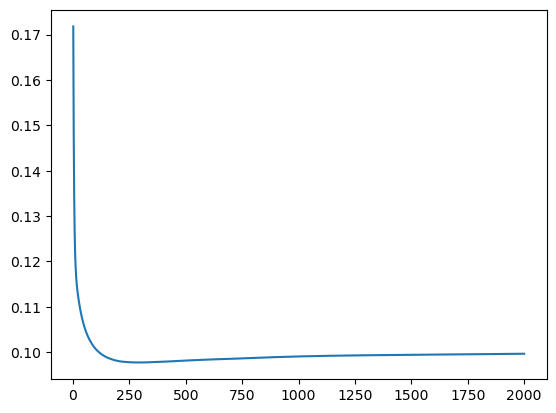

In [43]:
pr.loss_plot()

## Classification Report for Ridge regression:

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        72
           1       0.57      0.46      0.51        28

    accuracy                           0.75       100
   macro avg       0.69      0.66      0.67       100
weighted avg       0.74      0.75      0.74       100



### Trying Ridge regression with polynomial degree = 3

In [45]:
pr = PolynomialRegression(degree = 3)

pr.transform_fit(X_train, y_train, 0.01, regularization="L2", epochs=500, _lambda=0.2)

epoch : 1, loss:  0.17130967376619333
epoch : 2, loss:  0.14648791694653557
epoch : 3, loss:  0.13477647247529254
epoch : 4, loss:  0.12696959457425716
epoch : 5, loss:  0.12114200578816024
epoch : 6, loss:  0.11662349079535696
epoch : 7, loss:  0.11305357714748138
epoch : 8, loss:  0.11019312859627999
epoch : 9, loss:  0.10787119508768418
epoch : 10, loss:  0.10596209129862992
epoch : 11, loss:  0.104372096982064
epoch : 12, loss:  0.10303065790515636
epoch : 13, loss:  0.10188425673514774
epoch : 14, loss:  0.10089203774460125
epoch : 15, loss:  0.10002263430274082
epoch : 16, loss:  0.09925184086303454
epoch : 17, loss:  0.09856088788675581
epoch : 18, loss:  0.09793515312002486
epoch : 19, loss:  0.0973631922937615
epoch : 20, loss:  0.0968360059139499
epoch : 21, loss:  0.09634648196631539
epoch : 22, loss:  0.09588897058593877
epoch : 23, loss:  0.09545895828258011
epoch : 24, loss:  0.09505281762807016
epoch : 25, loss:  0.09466761437240558
epoch : 26, loss:  0.09430095841469442

epoch : 214, loss:  0.0833585187329696
epoch : 215, loss:  0.0833781902593907
epoch : 216, loss:  0.08339812647451139
epoch : 217, loss:  0.08341832503206367
epoch : 218, loss:  0.08343878362033125
epoch : 219, loss:  0.08345949996151736
epoch : 220, loss:  0.08348047181112746
epoch : 221, loss:  0.08350169695736609
epoch : 222, loss:  0.08352317322054786
epoch : 223, loss:  0.08354489845252175
epoch : 224, loss:  0.08356687053610884
epoch : 225, loss:  0.08358908738455263
epoch : 226, loss:  0.08361154694098204
epoch : 227, loss:  0.08363424717788638
epoch : 228, loss:  0.08365718609660214
epoch : 229, loss:  0.08368036172681131
epoch : 230, loss:  0.08370377212605087
epoch : 231, loss:  0.08372741537923298
epoch : 232, loss:  0.0837512895981761
epoch : 233, loss:  0.083775392921146
epoch : 234, loss:  0.08379972351240703
epoch : 235, loss:  0.08382427956178318
epoch : 236, loss:  0.08384905928422848
epoch : 237, loss:  0.08387406091940669
epoch : 238, loss:  0.08389928273128015
epoch

epoch : 424, loss:  0.09129901213873494
epoch : 425, loss:  0.09134991871671312
epoch : 426, loss:  0.09140092487789275
epoch : 427, loss:  0.09145203048828562
epoch : 428, loss:  0.09150323541624142
epoch : 429, loss:  0.0915545395324247
epoch : 430, loss:  0.09160594270979218
epoch : 431, loss:  0.09165744482357001
epoch : 432, loss:  0.09170904575123169
epoch : 433, loss:  0.0917607453724759
epoch : 434, loss:  0.09181254356920476
epoch : 435, loss:  0.09186444022550226
epoch : 436, loss:  0.09191643522761303
epoch : 437, loss:  0.09196852846392117
epoch : 438, loss:  0.0920207198249295
epoch : 439, loss:  0.09207300920323898
epoch : 440, loss:  0.09212539649352826
epoch : 441, loss:  0.0921778815925336
epoch : 442, loss:  0.09223046439902899
epoch : 443, loss:  0.09228314481380638
epoch : 444, loss:  0.09233592273965628
epoch : 445, loss:  0.09238879808134841
epoch : 446, loss:  0.0924417707456128
epoch : 447, loss:  0.09249484064112083
epoch : 448, loss:  0.0925480076784666
epoch 

In [46]:
y_pred = [1 if i > 0.5 else 0 for i in pr.predict(X_test)]

print(f"Accuracy is: {accuracy_score(y_test, y_pred)}")

Accuracy is: 0.68


<h2>Insights Drawn</h2>

- The accuracy score when we use no regularisation is 69.3%, as the weights are allowed to increase in size and hence the model may overfit.
- Futhermore, the accuracy when we use L2 regularisation or Ridge regression is much higher than that of L1 or Lasso regression. This shows that the predicting power of our dataset is spread out over all features, and none of our features are zeroed out.
- The model performs better with degree = 2, as a higher degree will result in overfitting

<h1>5. Comparison of Logistic Regression and Least Squares Classification</h1>
<h2>Logistic Regression</h2>

<p>LogisticRegression is a class which represents an implementation of the Logistic Regression algorithm for classification. The constuctor inintializes the learning rate, number of iterations, weights, bias and the costs list storing the cost after 10 iterations</p>
<br>
<p>The fit method optimizes the weight vector w which is initialized to all zeros, we also initialize the bias term as 0</p>
<br>
<p>The predict method is used to predict the target value. It considers examples with sigmoid values >= 0.5 as belonging to outcome class 1 and those with sigmoid values < 0.5 as belonging to outcome class 0</p>

In [47]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.costs = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = len(y)
        h = self.sigmoid(X.dot(self.weights) + self.bias)
        cost = (-1 / m) * np.sum((y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))))  # log loss
        return cost

    def gradient_descent(self, X, y):
        m = len(y)
        self.costs = []

        for i in range(self.num_iterations):
            h = self.sigmoid(X.dot(self.weights) + self.bias)
            gradient = (1 / m) * X.T.dot(h - y)
            self.weights -= self.learning_rate * gradient
            self.bias -= self.learning_rate * (1 / m) * np.sum(h - y)
            cost = self.compute_cost(X, y)
            if i % 10 == 0:
                self.costs.append(cost)

    def fit(self, X_train, y_train, learning_rate=None, num_iterations=None):
        if learning_rate is not None:
            self.learning_rate = learning_rate
        if num_iterations is not None:
            self.num_iterations = num_iterations

        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0.0
        self.gradient_descent(X_train, y_train)

    def predict(self, X_test):
        probabilities = self.sigmoid(X_test.dot(self.weights) + self.bias)
        return (probabilities >= 0.5).astype(int)

    def report(self, y_test, y_pred):
        return classification_report(y_test, y_pred, target_names=["class 0", "class 1"])
    
    def confusion_matrix(self,y_test,y_pred):
        return confusion_matrix(y_test,y_pred)


In [48]:
lr_model = LogisticRegression()

# Fit the model to the training data with custom learning rate and num_iterations
lr_model.fit(X_train, y_train, learning_rate=0.01, num_iterations=1000)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Calculate and print the classification report and confusion matrix
report = lr_model.report(y_test, y_pred)
print(report)

conf_mat = lr_model.confusion_matrix(y_test,y_pred)
print(conf_mat)

              precision    recall  f1-score   support

     class 0       0.86      0.93      0.89        72
     class 1       0.77      0.61      0.68        28

    accuracy                           0.84       100
   macro avg       0.82      0.77      0.79       100
weighted avg       0.83      0.84      0.83       100

[[67  5]
 [11 17]]


<h2>Least Squares Classification</h2>

<p>The LeastSquaresClassifier is a class which represents an implementation of the Least Squares Classification algorithm. The constuctor inintializes the values of weights and z_train and z_test.</p>
<br>
<p>After entering the input matrix X in the model an additional column is created to accomodate for the bias terms. All terms of this column are set to one. This is done to represent the formula $ Xw = y$, where $X_{i}$ is a *1 x ($d$+1)* vector where d represents the number of input features and $X_{0}{i} = 1$.</p>
<br>
<p>We use the one_hot function to encode the target values to a one hot encoded vector representing the outcomes.</p>
<br>
<p>We calculate the normal equation for calculation of optimal weights by minimising the error function.</p>
<br>
<p>The predict method is used to predict the target value.</p>

In [49]:
class LeastSquaresClassifier:
    def __init__(self):
        self.weights = None
        self.z_train = None
        self.z_test = None

    def one_hot(self, matrix):
        shape = (matrix.size, matrix.max() + 1)
        one_hot = np.zeros(shape)
        rows = np.arange(matrix.size)
        one_hot[rows, matrix.ravel()] = 1
        one_hot = one_hot.reshape((*matrix.shape, matrix.max() + 1))
        return one_hot

    def fit(self, X_train, y_train):
        z_train = np.ones((X_train.shape[0], 1))
        self.z_train = z_train
        Xtil = np.append(z_train, X_train, axis=1)

        T = self.one_hot(y_train)

        weights = np.dot(np.linalg.inv(np.dot(Xtil.T, Xtil)), np.dot(Xtil.T, T))
        self.weights = weights

    def predict(self, X_test):
        z_test = np.ones((X_test.shape[0], 1))
        self.z_test = z_test
        X_test_til = np.append(z_test, X_test, axis=1)

        y_pred = np.dot(X_test_til, self.weights)
        y_pred_act = np.argmax(y_pred, axis=1)
        return y_pred_act
    
    def report(self, y_test, y_pred):
        return classification_report(y_test, y_pred, target_names=["class 0", "class 1"])
    
    def confusion_matrix(self,y_test,y_pred):
        return confusion_matrix(y_test,y_pred)

In [50]:
classifier = LeastSquaresClassifier()

# Fit the model
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Calculate and print the classification report and confusion matrix
report = lr_model.report(y_test, y_pred)
print(report)

conf_mat = lr_model.confusion_matrix(y_test,y_pred)
print(conf_mat)

              precision    recall  f1-score   support

     class 0       0.86      0.90      0.88        72
     class 1       0.71      0.61      0.65        28

    accuracy                           0.82       100
   macro avg       0.78      0.75      0.77       100
weighted avg       0.81      0.82      0.82       100

[[65  7]
 [11 17]]


<h2>Insights Drawn</h2>

Achieved comparable accuracy to sklearn default logistic regression function proving our implementation correctly classifies the data.
The least squares classifier also acheived similar error to both our logistic regression function and the inbuilt sklearn function hence verifying our implementation of Least Squares Classification through utilizing the Normal Equation.

In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 

print(classification_report(y_test, y_pred, target_names=["class 0","class 1"]))
print(confusion_matrix(y_test,y_pred),"\n\n\n")

              precision    recall  f1-score   support

     class 0       0.84      0.89      0.86        72
     class 1       0.67      0.57      0.62        28

    accuracy                           0.80       100
   macro avg       0.75      0.73      0.74       100
weighted avg       0.79      0.80      0.80       100

[[64  8]
 [12 16]] 





<h1>6. References</h1>
<br>
<ol>
    <li><a href="https://colab.research.google.com/drive/1MCTkTj9-93Ei-cLDQoj9AXaqPhpue7a3?usp=sharing" target=blank>SDV: Synthesize a table (Gaussian Copula).ipynb - Colaboratory (google.com) (for creating data using Gaussian Copula)</a></li>
    <li><a href="https://colab.research.google.com/drive/15iom9fO8j_gHg4-NlGkzWF5thMWStXwv?usp=sharing" target=blank>Gaussian Copula - an overview | ScienceDirect Topics (for understanding about Gaussian Copulas)</a></li>
    <li><a href="https://docs.sdv.dev/sdv/single-table-data/data-preparation" target=blank>Data Preparation - Synthetic Data Vault (sdv.dev) (the actual thing which helped create the dataset)</a></li>
    <li><a href="https://www.verywellhealth.com/sugar-and-hypertension-5117022" target=blank>Does Sugar Raise Blood Pressure</a></li>
    <li><a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7112218/" target=blank>Does a rise in BMI cause an increased risk of diabetes?: Evidence from India</a></li>
    <li><a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3968571/" target=blank>Body Mass Index Relates to Blood Pressure Among Adults</a></li>
    <li><a href="https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214" target=blank>Writing Math Equations in Jupyter Notebook: A Naive Introduction</a></li>
</ol>
    